In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train_df = pd.read_csv('/Users/harshjhunjhunwala/Desktop/github_datasets/forecasting_challenge/train.csv')
test_df = pd.read_csv('/Users/harshjhunjhunwala/Desktop/github_datasets/forecasting_challenge/test.csv')

# Extracting the year and month and creating new columns
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month

# Setting date as the index
test_df.set_index('date', inplace=True)
train_df.set_index('date', inplace=True)

train_df

,store,item,sales,year,month
date,,,,,
2013-01-01,1,1,13,2013,1
2013-01-02,1,1,11,2013,1
2013-01-03,1,1,14,2013,1
2013-01-04,1,1,13,2013,1
2013-01-05,1,1,10,2013,1
...,...,...,...,...,...
2017-12-27,10,50,63,2017,12
2017-12-28,10,50,59,2017,12
2017-12-29,10,50,74,2017,12


In [21]:
store_1_df = train_df[train_df['store'] == 1]['sales'].sort_index(ascending=True)
store_2_df = train_df[train_df['store'] == 2]['sales'].sort_index(ascending=True)
store_3_df = train_df[train_df['store'] == 3]['sales'].sort_index(ascending=True)
store_4_df = train_df[train_df['store'] == 4]['sales'].sort_index(ascending=True)

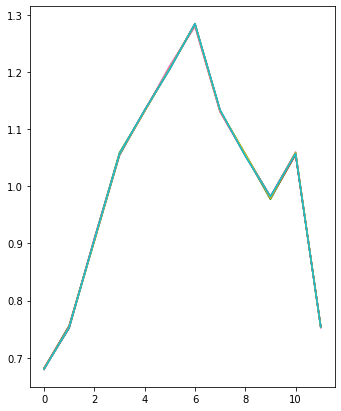

In [37]:
# aggregate of item sales categorized by year
agg_item = pd.pivot_table(train_df, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values

# aggregate of store sales categorized by year
agg_store = pd.pivot_table(train_df, index='year', columns='store',
                               values='sales', aggfunc=np.mean).values

agg_month_item = pd.pivot_table(train_df, index='month', columns='item',
                               values='sales', aggfunc=np.mean).values

agg_month_store = pd.pivot_table(train_df, index='month', columns='store',
                               values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.plot(agg_month_store/agg_month_store.mean(0))

In [38]:
# We see that sales rise in the middle months and are down in the beginning and the ending months and this trend continues every year

In [39]:
# Display sales trend over the years!! Not using tensorflow to predict and creating a simple prediction model instead...